In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [87]:
import numpy as np

In [21]:
img_sz=256
batch_sz=32
epochs=50

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
shuffle=True,
image_size=(img_sz,img_sz),
batch_size=batch_sz)

Found 2152 files belonging to 3 classes.


In [7]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[0 1 0 2 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1]


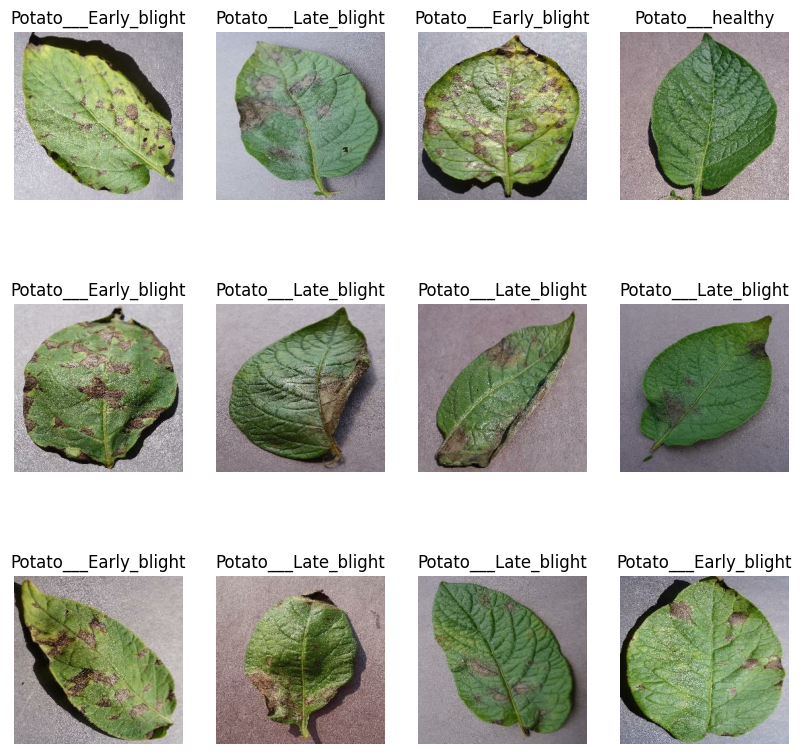

In [20]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    print(image_batch.shape)
    print(label_batch.numpy())

In [23]:
train_size=0.8
test_size=0.1
val_size=0.1
print("Train batches ",train_size*len(dataset))
print("Test batches ",test_size*len(dataset))
print("Validation batches ",val_size*len(dataset))

Train batches  54.400000000000006
Test batches  6.800000000000001
Validation batches  6.800000000000001


In [25]:
train_ds=dataset.take(54)
print("Train Dataset Length in batches :",len(train_ds))
left=dataset.skip(54)
val_ds=left.take(6)
print("Validation Dataset Length in batches:", len(val_ds))
test_ds=left.skip(6)
print("Test Dataset Length in batches:",len(test_ds))

Train Dataset Length in batches : 54
Validation Dataset Length in batches: 6
Test Dataset Length in batches: 8


In [26]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    
    ds=ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [27]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [31]:
len(test_ds)

8

In [ ]:
#train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 

In [46]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_sz,img_sz),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [47]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [70]:
input_shape=(32,img_sz,img_sz,3)
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(3,activation='softmax'),
    
])
model.build(input_shape=input_shape)

In [71]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [72]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [73]:
history=model.fit(
    train_ds,
    epochs=20,
    batch_size=batch_sz,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
54/54 [==============================] - 74s 1s/step - loss: 0.9281 - accuracy: 0.4711 - val_loss: 0.8692 - val_accuracy: 0.4635
Epoch 2/20
54/54 [==============================] - 69s 1s/step - loss: 0.8361 - accuracy: 0.5387 - val_loss: 0.8556 - val_accuracy: 0.5990
Epoch 3/20
54/54 [==============================] - 68s 1s/step - loss: 0.6743 - accuracy: 0.6921 - val_loss: 0.3592 - val_accuracy: 0.8750
Epoch 4/20
54/54 [==============================] - 69s 1s/step - loss: 0.4858 - accuracy: 0.8198 - val_loss: 0.5418 - val_accuracy: 0.7865
Epoch 5/20
54/54 [==============================] - 67s 1s/step - loss: 0.3346 - accuracy: 0.8539 - val_loss: 0.3221 - val_accuracy: 0.8929
Epoch 6/20
54/54 [==============================] - 69s 1s/step - loss: 0.2799 - accuracy: 0.8908 - val_loss: 0.2185 - val_accuracy: 0.9219
Epoch 7/20
54/54 [==============================] - 75s 1s/step - loss: 0.2114 - accuracy: 0.9214 - val_loss: 0.2328 - val_accuracy: 0.9115
Epoch 8/20
54/54 [==

In [74]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 4s 388ms/step - loss: 0.0728 - accuracy: 0.9727


In [75]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

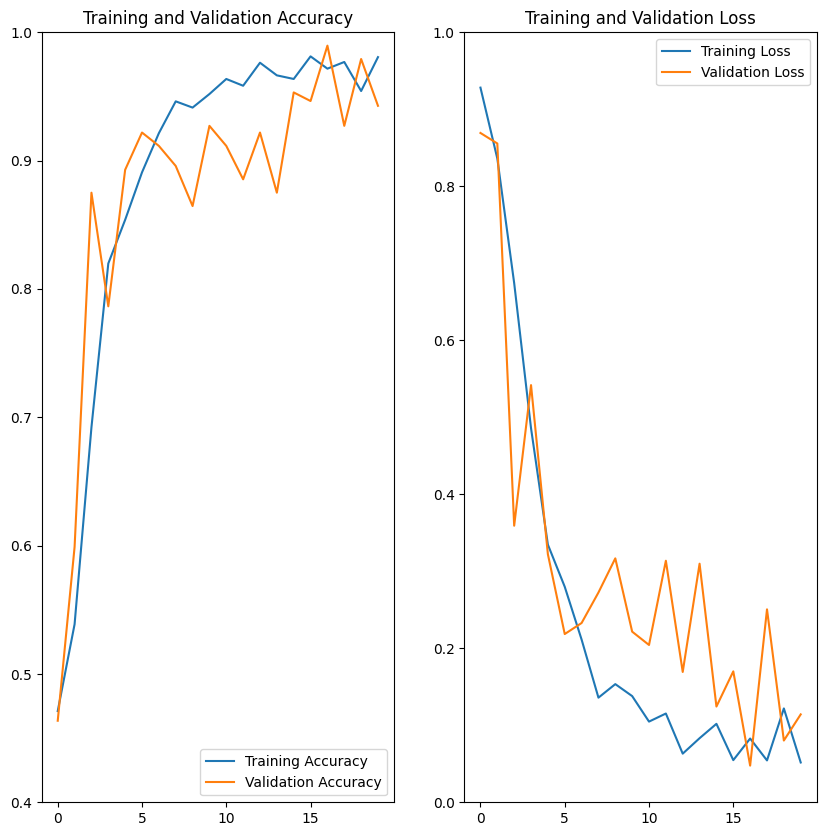

In [80]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.ylim(0.4, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.ylim(0, 1)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [85]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 26ms/step


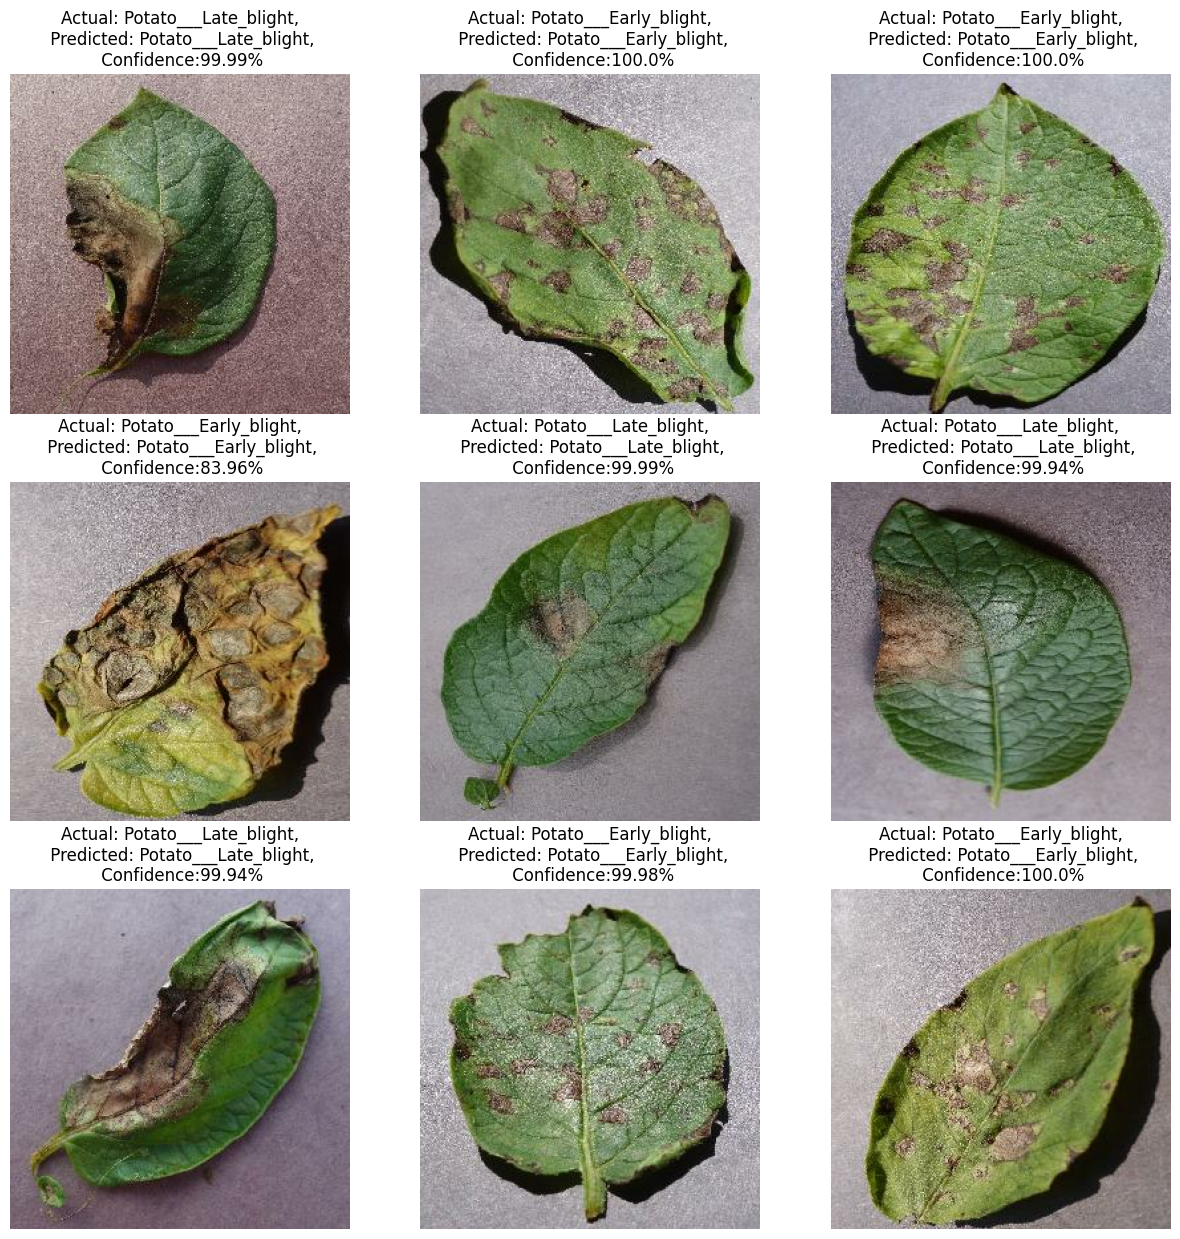

In [88]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence=predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence:{confidence}%")
        plt.axis("off")
        
        

In [89]:
model_version=1
model.save(f"../model/{model_version}")

INFO:tensorflow:Assets written to: ../model/1\assets


INFO:tensorflow:Assets written to: ../model/1\assets
